# Additional Investigation of the Relationship between Admission Counts, Length of Stay, and Average Daily Jail Population

In [17]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [18]:
#import 30-day data
_30day_pop_tot = pd.read_csv("../Data/_30_day_adp.csv", index_col = 0)
IV_df = pd.read_csv("../Data/_30_day_IVs.csv", index_col=0)
_30day_pop_tot.head()

,Start Date,End Date,ADP
0,2016-05-16,2016-06-14,9821.0
1,2016-06-15,2016-07-14,9792.0
2,2016-07-15,2016-08-13,9732.0
3,2016-08-14,2016-09-12,9830.0
4,2016-09-13,2016-10-12,9840.0


In [19]:
IV_df.head()

,Start Date,End Date,admission_count,discharge_count,Avg LOS Days
0,2016-05-16,2016-06-14,4961,5036,57.516161
1,2016-06-15,2016-07-14,4918,5011,63.843071
2,2016-07-15,2016-08-13,4846,4725,59.396913
3,2016-08-14,2016-09-12,4578,4452,57.784929
4,2016-09-13,2016-10-12,4572,4692,60.720000


In [20]:
#compute LOS as 30-day period instead of days
IV_df['LOS (30-Day Periods)'] = np.ceil(IV_df['Avg LOS Days']/30)
IV_df.head()

,Start Date,End Date,admission_count,discharge_count,Avg LOS Days,LOS (30-Day Periods)
0,2016-05-16,2016-06-14,4961,5036,57.516161,2.0
1,2016-06-15,2016-07-14,4918,5011,63.843071,3.0
2,2016-07-15,2016-08-13,4846,4725,59.396913,2.0
3,2016-08-14,2016-09-12,4578,4452,57.784929,2.0
4,2016-09-13,2016-10-12,4572,4692,60.720000,3.0


In [21]:
ADP = pd.DataFrame(columns=['Start Date', 'End Date', 'ADP Estimate'])
#initial admission data point
adm0 = 0
initial_los_period = IV_df.at[0,'LOS (30-Day Periods)']
for idx, row in IV_df.iterrows():
    
    if idx >= initial_los_period:
        adp_i = row['admission_count'] + ADP.at[(idx-initial_los_period),'ADP Estimate'] - IV_df.at[idx - row['LOS (30-Day Periods)'],'admission_count']
        #store in ADP df
        ADP.at[(idx-initial_los_period+1),'Start Date'] = row['Start Date']
        ADP.at[(idx-initial_los_period+1),'End Date'] = row['End Date']
        ADP.at[(idx-initial_los_period+1),'ADP Estimate'] = adp_i
        
    elif idx < initial_los_period:
        adm0 = adm0 + IV_df.at[idx,'admission_count']
    
    #store as first ADP Estimate
    ADP.at[0,'Start Date'] = IV_df.at[0,'Start Date']
    ADP.at[0,'End Date'] = IV_df.at[0,'End Date']
    ADP.at[0,'ADP Estimate'] = adm0
    

In [22]:
ADP.head()

,Start Date,End Date,ADP Estimate
0,2016-05-16,2016-06-14,9879
1,2016-07-15,2016-08-13,9764
2,2016-08-14,2016-09-12,9424
3,2016-09-13,2016-10-12,9078
4,2016-10-13,2016-11-11,9043


In [23]:
_30day_pop_tot.head()

,Start Date,End Date,ADP
0,2016-05-16,2016-06-14,9821.0
1,2016-06-15,2016-07-14,9792.0
2,2016-07-15,2016-08-13,9732.0
3,2016-08-14,2016-09-12,9830.0
4,2016-09-13,2016-10-12,9840.0


In [24]:
print(len(ADP),len(_30day_pop_tot))

96 98


In [34]:
#also calculate admission*los variables
littles_law_cal_1 = IV_df['admission_count']*IV_df['LOS (30-Day Periods)']
littles_law_cal_2 = IV_df['admission_count']*IV_df['LOS (30-Day Periods)'].mean().round()
littles_law_cal_3 = IV_df['admission_count']*IV_df['LOS (30-Day Periods)'].rolling(3).mean().round()

In [28]:
IV_df['LOS (30-Day Periods)'].mean().round()

3.0

In [33]:
IV_df['LOS (30-Day Periods)'].rolling(3).mean().round()

0     NaN
1     NaN
2     2.0
3     2.0
4     2.0
     ... 
92    4.0
93    4.0
94    4.0
95    4.0
96    4.0
Name: LOS (30-Day Periods), Length: 97, dtype: float64

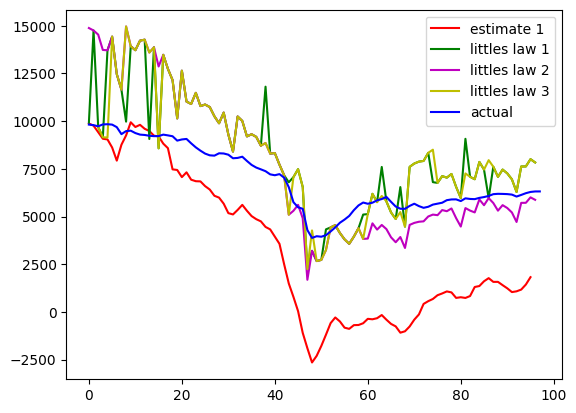

In [35]:
plt.plot(ADP.index, ADP['ADP Estimate'],'r', label = 'estimate 1')
plt.plot(IV_df.index, littles_law_cal_1,'g', label = 'littles law 1')
plt.plot(IV_df.index, littles_law_cal_2,'m', label = 'littles law 2')
plt.plot(IV_df.index, littles_law_cal_3,'y', label = 'littles law 3')
plt.plot(_30day_pop_tot.index, _30day_pop_tot['ADP'], 'b', label = 'actual')
plt.legend()